<a href="https://colab.research.google.com/github/paulmachau/-project-1/blob/main/Movie_Budgets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
df = pd.read_csv('tn.movie_budgets.csv')
df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [ ]:
# Convert release_date column to datetime data type
df['release_date'] = pd.to_datetime(df['release_date'])


The  code turms the date column into uniform date for better data presentation using the df['release date'] function


In [ ]:
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
# Check for duplicated data
print(df.duplicated().sum())

0


In [ ]:
# Check for null values
print(df.isnull().sum())

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


Checking for null values using the .isnull fuctions confirms if there are any null values and  for our case there are no null values in all the columns

In [ ]:
# Remove leading and trailing whitespace from all string columns in a DataFrame
df = df.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


By standardizing the format of data in a Pandas DataFrame, we can ensure that the data is consistent and ready for analysis.

In [ ]:
# Remove commas and dollar signs from the budget and gross columns
df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)

# Calculate the correlation matrix
correlation_matrix = df[['production_budget', 'domestic_gross', 'worldwide_gross']].corr()

# Print the correlation matrix

print(correlation_matrix)

                   production_budget  domestic_gross  worldwide_gross
production_budget           1.000000        0.685682         0.748306
domestic_gross              0.685682        1.000000         0.938853
worldwide_gross             0.748306        0.938853         1.000000


<ipython-input-11-9ae3fad455a8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['production_budget'] = df['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-11-9ae3fad455a8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['domestic_gross'] = df['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(float)
<ipython-input-11-9ae3fad455a8>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['worldwide_gross'] = df['worldwide_gross'].str.replace(',', '').str.replac

first remove the dollar sign and the commers on the data set using the str.replace() method. Then, it uses the astype() method with the argument float to convert these columns into float values. this enable to run the  correlation matrix code that shows us the correlation between 'production_budget', 'domestic_gross', 'worldwide_gross' data

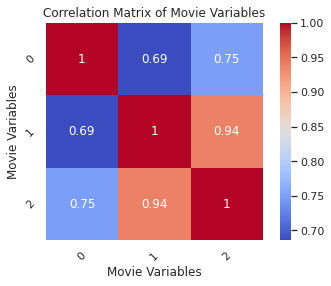

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# create correlation matrix
corr = [[1.000000, 0.685682, 0.748306],
        [0.685682, 1.000000, 0.938853],
        [0.748306, 0.938853, 1.000000]]

# set variable names
variables = ['Production Budget', 'Domestic Gross', 'Worldwide Gross']

# create heatmap using seaborn
sns.set(style='white')
sns.heatmap(corr, cmap='coolwarm', annot=True, square=True)

# add title and axis labels
plt.title('Correlation Matrix of Movie Variables')
plt.xlabel('Movie Variables')
plt.ylabel('Movie Variables')

# rotate x and y axis labels
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# show plot
plt.show()



This code generates a heatmap using the Seaborn library to visualize a correlation matrix. The correlation matrix is a 3x3 matrix that contains the correlation coefficients between three movie variables.

The heatmap shows the correlation values using colors, where darker colors represent higher correlation values. The cmap parameter in the sns.heatmap function sets the color palette to 'coolwarm', which ranges from cool (blue) to warm (red).

The annot parameter adds the correlation values to each cell in the heatmap. The square parameter ensures that the heatmap has square cells.

Finally, the plt.title, plt.xlabel, and plt.ylabel functions add a title and axis labels to the plot. The plt.show function displays the plot.